In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## Data Exploration

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


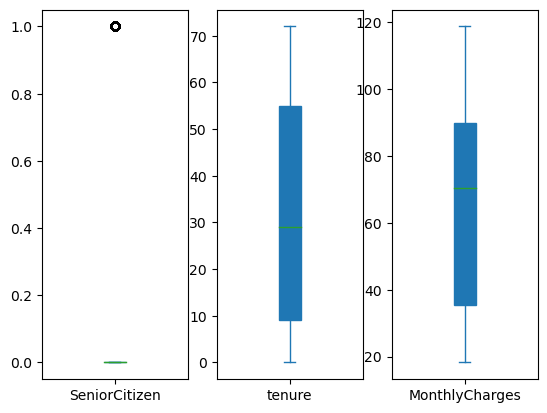

In [6]:
df_to_plot = df.drop(columns=['customerID'])

df_to_plot.plot(subplots=True, kind='box', patch_artist=True)
plt.savefig('boxplots.png', bbox_inches='tight')

## Correlations

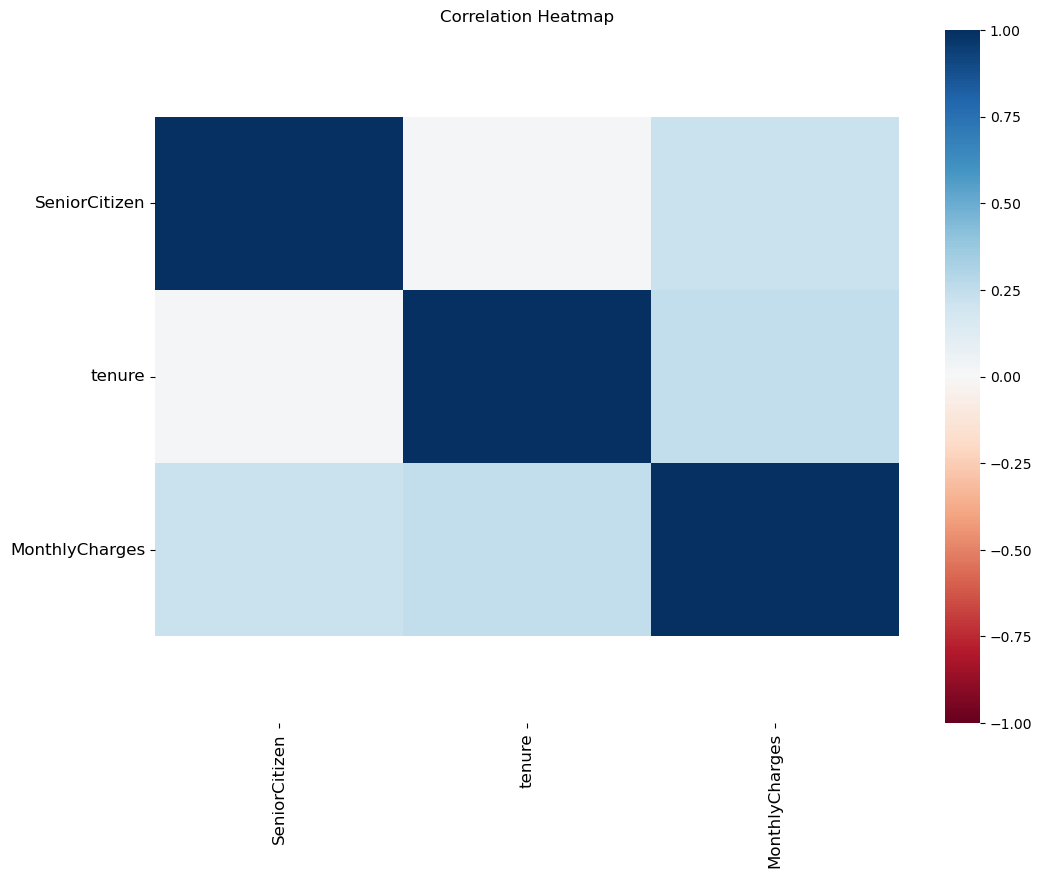

In [7]:
# select columns to plot
df_to_plot = df.drop(columns=['customerID'])

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In [8]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
## No Correlations between the numerical variables

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

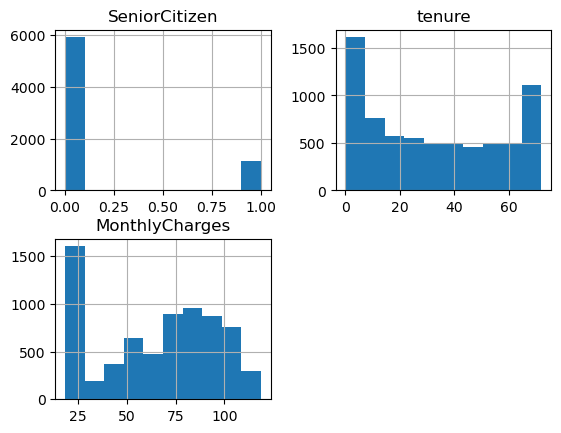

In [10]:
df.hist()

In [11]:
df = df.drop(columns=['customerID'])
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df = df.dropna()
y = df['Churn']
X = df.drop(columns='Churn')
X = pd.get_dummies(X)

In [12]:
y_dummy = []
for i in y:
    if i=='No':
        a = 0
    else:
        a = 1
    y_dummy.append(a)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [16]:
y_pred = log_reg.predict(X_test)

In [17]:
log_reg.score(X_test, y_test)

0.8042654028436019

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
import seaborn as sns

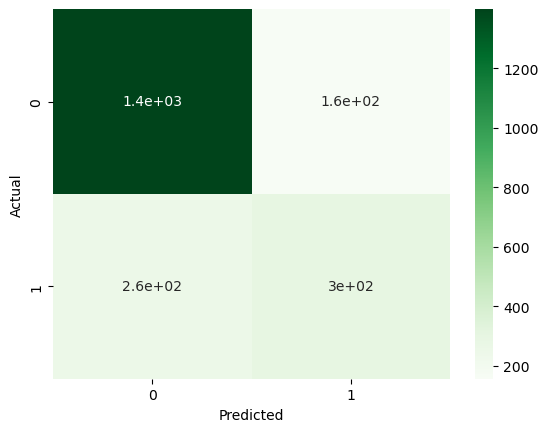

In [21]:
sns.heatmap(cm, cmap = "Greens", annot = True, 
            cbar_kws = {"orientation": "vertical"},
                       xticklabels = [0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
## Logistic Regression using statsmodels

In [23]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [24]:
# Convert TotalCharges to numeric (some entries may be blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Reset index after dropping
df = df.reset_index(drop=True)

In [25]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [27]:
# Drop constant or near-constant columns
X = X.loc[:, X.nunique() > 1]

# Drop perfectly correlated columns
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
X = X.drop(columns=to_drop)

In [28]:
X = sm.add_constant(X)

In [29]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Sat, 25 Oct 2025   Pseudo R-squ.:                  0.2845
Time:                        15:43:52   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1653      

In [30]:
coef_df = pd.DataFrame({
    'Variable': result.params.index,
    'Coefficient': result.params.values,
    'p-value': result.pvalues
}).sort_values('p-value')

# Show top 10 significant predictors
print(coef_df.head(10))

                                                      Variable  Coefficient  \
tenure                                                  tenure    -0.060588   
Contract_Two year                            Contract_Two year    -1.357106   
Contract_One year                            Contract_One year    -0.660795   
TotalCharges                                      TotalCharges     0.000329   
PaperlessBilling_Yes                      PaperlessBilling_Yes     0.342354   
PaymentMethod_Electronic check  PaymentMethod_Electronic check     0.304467   
SeniorCitizen                                    SeniorCitizen     0.216775   
MultipleLines_Yes                            MultipleLines_Yes     0.448395   
InternetService_No                          InternetService_No    -1.786295   
InternetService_Fiber optic        InternetService_Fiber optic     1.747475   

                                     p-value  
tenure                          2.585486e-22  
Contract_Two year               1.46

In [31]:
# Calculate odds ratios and confidence intervals
odds_ratios = np.exp(result.params)
conf = np.exp(result.conf_int())
odds_df = pd.DataFrame({
    'Variable': result.params.index,
    'Odds Ratio': odds_ratios,
    'CI Lower': conf[0],
    'CI Upper': conf[1],
    'p-value': result.pvalues
}).sort_values('p-value')

# Display top 10
print(odds_df.head(10))

                                                      Variable  Odds Ratio  \
tenure                                                  tenure    0.941211   
Contract_Two year                            Contract_Two year    0.257405   
Contract_One year                            Contract_One year    0.516440   
TotalCharges                                      TotalCharges    1.000329   
PaperlessBilling_Yes                      PaperlessBilling_Yes    1.408258   
PaymentMethod_Electronic check  PaymentMethod_Electronic check    1.355902   
SeniorCitizen                                    SeniorCitizen    1.242065   
MultipleLines_Yes                            MultipleLines_Yes    1.565798   
InternetService_No                          InternetService_No    0.167580   
InternetService_Fiber optic        InternetService_Fiber optic    5.740090   

                                CI Lower   CI Upper       p-value  
tenure                          0.929777   0.952786  2.585486e-22  
Contr